<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Стандартизируем-численные-признаки" data-toc-modified-id="Стандартизируем-численные-признаки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизируем численные признаки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#ROC-кривая-и-AUC-ROC" data-toc-modified-id="ROC-кривая-и-AUC-ROC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ROC-кривая и AUC-ROC</a></span></li><li><span><a href="#DummyClassifier" data-toc-modified-id="DummyClassifier-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>DummyClassifier</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

**Входные данные:**

- Исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)
        
**Цель исследования:**
        
- Cпрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
  
**Задачи**

- Построить модель с предельно большим значением *F1*-меры. Довести метрику минимум, до 0.59

- Проверить *F1*-меру на тестовой выборке.

- Дополнительно: Измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.


**Этапы исследования:**

- Подготовка данных

- Исследование задачи

- Обучение модели

- Борьба с дисбалансом

- Тестирование модели

- Общий вывод

## Подготовка данных

**Признаки**

`RowNumber` — индекс строки в данных

`CustomerId` — уникальный идентификатор клиента

`Surname` — фамилия

`CreditScore` — кредитный рейтинг

`Geography` — страна проживания

`Gender` — пол

`Age` — возраст

`Tenure` — сколько лет человек является клиентом банка

`Balance` — баланс на счёте

`NumOfProducts` — количество продуктов банка, используемых клиентом

`HasCrCard` — наличие кредитной карты

`IsActiveMember` — активность клиента

`EstimatedSalary` — предполагаемая зарплата

**Целевой признак**

`Exited` — факт ухода клиента

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle

pd.options.mode.chained_assignment = None #игнорирование ошибки при масштабировании.
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%0.4f' % x) #для корректного и понятного отображения больших числовых данных

Загружаем данные

In [2]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,9091.0000,4.9977,2.8947,0.0000,2.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

**Промежуточный вывод:**

- У нас 10000 объектов, 14 признаков. Целевой признак - `Exited` — факт ухода клиента.

- Пропуски только в столбце `Tenure` - сколько лет человек является клиентом банка. Предположительно, это клиенты, открывшие счет в период меньше года - новые клиенты. Заменим пропуски на "0". 

- Тип данных `Tenure` можно преобразовать в целочиленное. Остальные оптимизируем для экономии памяти.


In [6]:
data.Tenure = data.Tenure.fillna(0)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0000,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1.0000,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8.0000,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1.0000,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0000,125510.8200,1,1,1,79084.1000,0


Данные столбцов: `RowNumber`, `CustomerId` и `Surname` в выборках нам не пригодятся, т.к. предположительно, влияния на целевой признак `Exited` не оказывают.

In [8]:
data_filtered = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [9]:
data_filtered.Tenure = data_filtered.Tenure.astype('int32')
data_filtered[data_filtered.select_dtypes('float64').columns] = data_filtered.select_dtypes('float64').astype('float32')
data_filtered[data_filtered.select_dtypes('int64').columns] = data_filtered.select_dtypes('int64').astype('int32')

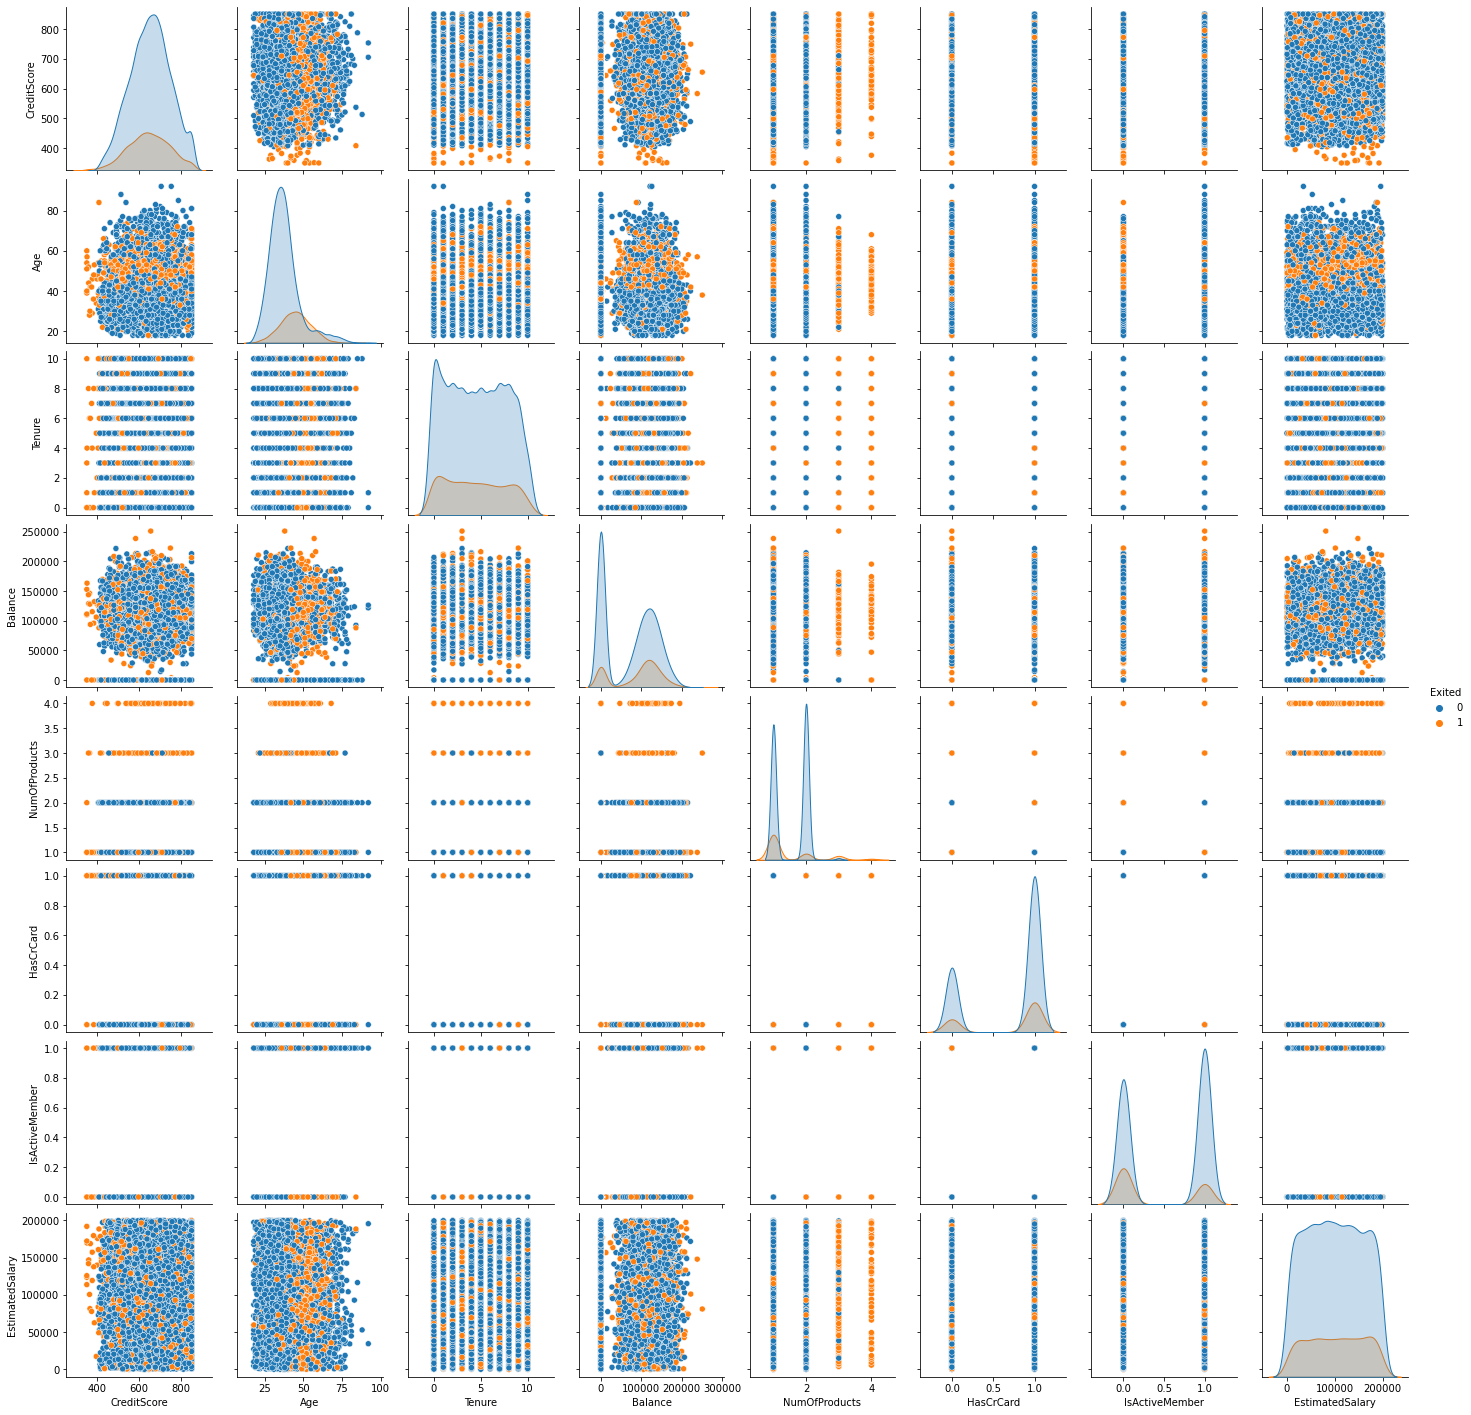

In [10]:
sns.pairplot(data_filtered, hue="Exited");

## Исследование задачи

Корреляция целевого признака с остальными слабая

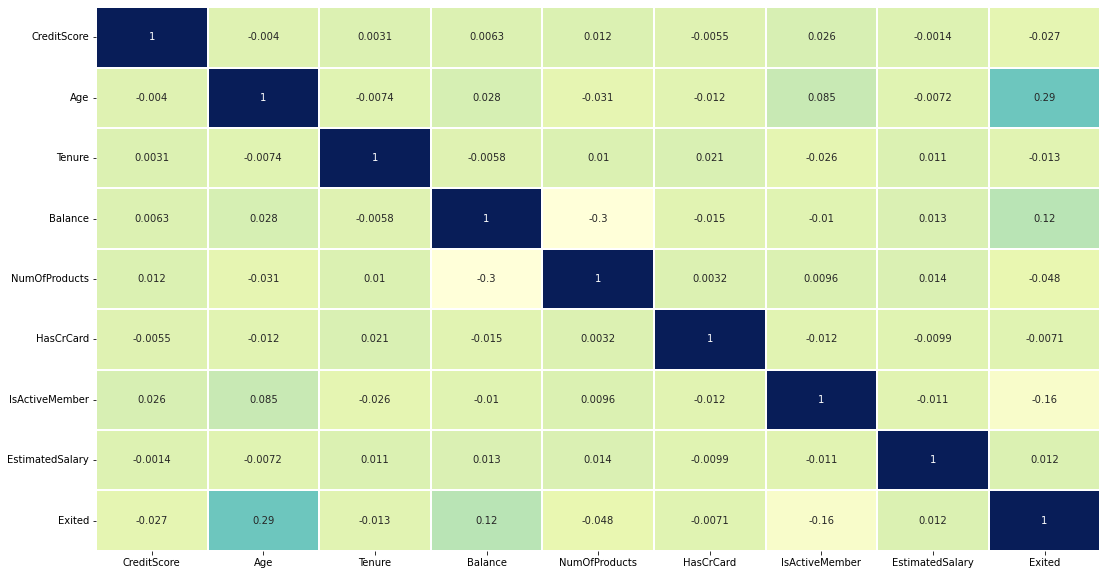

In [11]:
plt.figure(figsize=(18, 10))
sns.heatmap(data_filtered.corr(), annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

С категориальными признаками в выборках - данные столбцов `Geography` и `Gender`.

In [12]:
data_filtered.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
data_filtered.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Разобьем эти признаки на группы и преобразуем в численные, техникой OHE, с применением аргумента 'drop_first', чтобы избежать дамми-ловушку.

In [14]:
data_ohe = pd.get_dummies(data_filtered, columns=['Geography', 'Gender'], drop_first=True)
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0000,1,1,1,101348.8828,1,0,0,0
1,608,41,1,83807.8594,1,0,1,112542.5781,0,0,1,0
2,502,42,8,159660.7969,3,1,0,113931.5703,1,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6328,0,0,0,0
4,850,43,2,125510.8203,1,1,1,79084.1016,0,0,1,0


In [15]:
features = data_ohe.drop(['Exited'],axis=1)
target = data_ohe['Exited']

Разобъем данные на 3 выборки: тренировочную выборку (60%), выборку для валидации (20%) и выборку для теста (20%)

In [16]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

Исследуем целевой признак. Чтобы в будущем оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0».

## Обучение модели

### DecisionTreeClassifier

Подберем наилучшие параметры для модели

In [18]:
parametrs = {'max_depth': range (1,10)}

In [19]:
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 6}

Обучим модель с выбранными параметрами и проверим на валидационной выборке

In [20]:
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_dtc.fit(features_train, target_train)
predicted_valid = model_dtc.predict(features_valid)

model_dtc.score(features_valid, target_valid)

0.858

In [21]:
f1_score(target_valid, predicted_valid)

0.5696969696969697

Не лучшее соотношение Precision и Recall. f1-мера 0.569.

Посмотрим насколько модель отличается от случайной

In [22]:
probabilities_valid = model_dtc.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:,1])

0.8164631712023421

От случайной далеко, но и до идеальной тоже. AUC-ROC: 0.816. Проверим на других моделях

### RandomForestClassifier

Подберем наилучшие параметры для модели

In [23]:
parametrs = { 'n_estimators': range (10, 101, 10),
              'max_depth': range (1,10) }

In [24]:
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_train, target_train)
grid.best_params_

{'max_depth': 9, 'n_estimators': 60}

Обучим модель с выбранными параметрами и проверим на валидационной выборке

In [25]:
model_clf = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=9)
model_clf.fit(features_train, target_train)
predicted_valid = model_clf.predict(features_valid)

model_clf.score(features_valid, target_valid)

0.8605

In [26]:
f1_score(target_valid, predicted_valid)

0.5674418604651162

In [27]:
probabilities_valid = model_clf.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:,1])

0.8493503469050744

### LogisticRegression

In [28]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)

model_lr.score(features_valid, target_valid)

0.7815

In [29]:
f1_score(target_valid, predicted_valid)

0.08385744234800838

In [30]:
probabilities_valid = model_lr.predict_proba(features_valid)
roc_auc_score(target_valid, probabilities_valid[:,1])

0.6727584246214894

### Вывод

Наиболее подходящая модель RandomForestClassifier с параметрами n_estimators=60 и max_depth=9. Метрики: accuracy = 0.86, f1-мера = 0.567, AUC-ROC = 0.849. Попробуем довести F1 до целевого 0.59. 

В признаках есть дисбаланс. Исследуем его ниже.

## Борьба с дисбалансом

Исходный дисбаланс классов для целевого признака

In [31]:
class_frequency = target.value_counts(normalize=True)
class_frequency

0   0.7963
1   0.2037
Name: Exited, dtype: float64

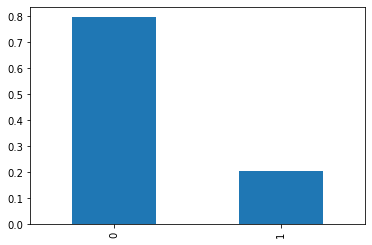

In [32]:
class_frequency.plot(kind='bar');

### Стандартизируем численные признаки

In [33]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [34]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000,6000.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.7078,0.5268,-0.0000,0.2468,0.2507,0.5485
std,1.0001,1.0001,1.0001,1.0001,1.0001,0.4548,0.4993,1.0001,0.4312,0.4334,0.4977
min,-3.1403,-1.9865,-1.4687,-1.2332,-0.8916,0.0000,0.0000,-1.7230,0.0000,0.0000,0.0000
25%,-0.6894,-0.6579,-0.8254,-1.2332,-0.8916,0.0000,0.0000,-0.8643,0.0000,0.0000,0.0000
50%,0.0219,-0.1834,0.1397,0.3262,-0.8916,1.0000,1.0000,0.0111,0.0000,0.0000,1.0000
75%,0.6710,0.4809,0.7830,0.8219,0.8302,1.0000,1.0000,0.8486,0.0000,1.0000,1.0000
max,2.0522,5.0363,1.7481,2.8062,4.2736,1.0000,1.0000,1.7390,1.0000,1.0000,1.0000


In [35]:
features_valid.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
mean,-0.0549,-0.0011,-0.0527,0.0129,0.0519,0.7045,0.4975,0.0283,0.2615,0.2345,0.5300
std,1.0021,1.0161,0.9964,1.0092,1.0081,0.4564,0.5001,1.0032,0.4396,0.4238,0.4992
min,-2.9845,-1.9865,-1.4687,-1.2332,-0.8916,0.0000,0.0000,-1.7216,0.0000,0.0000,0.0000
25%,-0.7621,-0.6579,-0.8254,-1.2332,-0.8916,0.0000,0.0000,-0.8390,0.0000,0.0000,0.0000
50%,-0.0352,-0.1834,-0.1820,0.3583,0.8302,1.0000,0.0000,0.0072,0.0000,0.0000,1.0000
75%,0.6606,0.4809,0.7830,0.8294,0.8302,1.0000,1.0000,0.9162,1.0000,0.0000,1.0000
max,2.0522,5.0363,1.7481,2.6047,4.2736,1.0000,1.0000,1.7401,1.0000,1.0000,1.0000


Построим матрицу ошибок

In [36]:
confusion_matrix(target_valid, predicted_valid)

array([[1543,   39],
       [ 398,   20]], dtype=int64)

Проверим на нашей модели Случайного леса

In [37]:
model_clf = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=9)
model_clf.fit(features_train, target_train)
predicted_valid = model_clf.predict(features_valid)

confusion_matrix(target_valid, predicted_valid)

array([[1538,   44],
       [ 235,  183]], dtype=int64)

Истинноположительных ответов больше. Посмотрим, как изменилась f1-мера

In [38]:
f1_score(target_valid, predicted_valid)

0.5674418604651162

Не достигли целевого показателя в 0.59.

### Уменьшение выборки

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [40]:
model_clf = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=9)
model_clf.fit(features_downsampled, target_downsampled)
predicted_valid = model_clf.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.591123701605288

F1=0.610. Попробуем противоположный метод: увеличим выборки

### Увеличение выборки

In [41]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Подберем гиперпараметры модели с учетом дисбаланса

In [42]:
parametrs = { 'n_estimators': range (10, 101, 10),
              'max_depth': range (1,10) }
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_upsampled, target_upsampled)
grid.best_params_

{'max_depth': 9, 'n_estimators': 80}

In [43]:
model_clf = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=9)
model_clf.fit(features_upsampled, target_upsampled)
predicted_valid = model_clf.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.6152219873150107

Целевое среднее гармоническое полноты и точности удалось достич.

## Тестирование модели

Проверим на тестовой выборке.

In [44]:
model_clf = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=9)
model_clf.fit(features_upsampled, target_upsampled)
predicted_test = model_clf.predict(features_test)

f1_score(target_test, predicted_test)

0.6118626430801248

### ROC-кривая и AUC-ROC

Построим ROC-кривую для тестовой модели

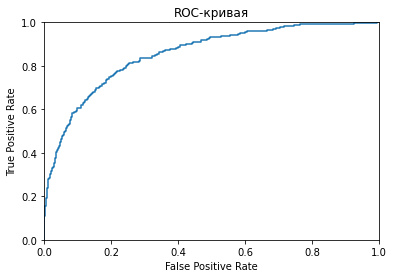

In [45]:
probabilities_test = model_clf.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Кривая ошибок высокая. Высокие значения TPR свидетельствуют о неплохом качестве модели.

Посчитаем AUC-ROC

In [46]:
roc_auc_score(target_test, probabilities_one_test)

0.8550529104098364

Метрика значительно лучше, чем у случайной модели, но все еще не идеальна.

### DummyClassifier

In [47]:
accuracy_score(target_test, predicted_test)

0.8135

In [48]:
model_dc = DummyClassifier(strategy='most_frequent', random_state=12345)
model_dc.fit(features_train, target_train)
model_dc.score(features_test, target_test)

0.7885

Результат accuracy модели DummyClassifier (0.7885) меньше, чем у модели RandomForestClassifier (0.8).

Модель адекватна

## Вывод

- Изучены данные. Признаки `RowNumber`, `CustomerId` и `Surname` удалены, т.к. влияния на целевой признак Exited не оказывают.

- Корреляция целевого признака с остальными очень слабая. Наибольшие результаты у признаков: Age (0.24), IsActiveMember(-0.16) и Balance(0.12)

- Категориальные признаки `Geography` и `Gender` преобразованы в численные, техникой OHE, с применением аргумента 'drop_first', чтобы избежать дамми-ловушку.

- Датасет разбит на 3 выборки: тренировочную выборку (60%), выборку для валидации (20%) и выборку для теста (20%)

- Обучены модели без учета дисбаланса. Подобраны оптимальные гиперпараметры для DecisionTreeClassifier (F1: 0.569, AUC-ROC: 0.816), RandomForestClassifier (F1: 0.567, AUC-ROC: 0.849) и LogisticRegression (F1: 0.33, AUC-ROC: 0.758)

- Наиболее подходящая модель RandomForestClassifier с параметрами n_estimators=60 и max_depth=9.

- Стандартизировали численные признаки. Уменьшили и увеличели выборку (для борьбы с дисбалансом). Подобраны оптимальные гиперпараметры с учетом дисбаланса. В результате, на валидационной выборке, достигнута метрика F1=0.615.

- Провели тестирование на тестовой выборке. Достигнутые метрики: accuracy:0.8, F1:0.612, AUC-ROC:0.85

- Модель прошла проверку на адекватность.